# Stroke Prediction

## Knowledge Discovery in Database Process (KDD)

![image.png](attachment:image.png)

1. Selection - jelasin datanya
2. preprocessing
* Ubah Tipe data hypertension dan heart_disease menjadi category
* Menghapus data gender yang Other
* isi nilai null pada bmi dengan rata-rata
* Handling Outlier - yang bagian Check outlier di sini tidak ada outlier yaa
3. Data Transformation
* Handling Outlier - tapi ga ada, silahkan kalau mau dimasukkin laporan
* Feature Scaling - kita pake standar scaler
* One Hot Encoding
* Handling Imbalance Data - pake smote
4. Data Mining
* Membagi data menjadi training dan testing set
* Modeling Pakai KNN
* Modeling pakai SVM
* Modeling pakai naive bayes
5. Interpretation
* Hasil Evaluasi Model
* Tampilin yang bagian visualisasi (*ini kalau diminta sama dospem yaa)

## Import Package dan Load Data

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)

In [ ]:
df = pd.read_csv('stroke_data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#pertama kita liat dulu info tentang datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include="O")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Oke sepertinya perlu beberapa preprocess dulu nih data.

1. hypertension sama heart_disease diubah jadi category/object
2. itu kenapa gender ada 3
3. handling missing value
4. ever_married, work_type, Residence_type dan smoking_status perlu ditransformasi

## Preprocessing

mari kita preprocess

In [ ]:
#ubah tipe data
df.hypertension = df.hypertension.astype('category')
df.heart_disease = df.heart_disease.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
dtypes: category(2), float64(3), int64(2), object(5)
memory usage: 409.6+ KB


udah berubah ya tipe datanya

In [ ]:
#cek data gender
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Waduh, non-binary kah?

In [ ]:
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Datanya oke sih, tapi kita apus aja biar mudah interpretasinya

In [ ]:
#hapus yang gendernya Other
df = df[df.gender != 'Other']

In [ ]:
#cek data gender (lagi)
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

oke udah clear

In [ ]:
#kita isi nilai null pada feature bmi dengan nilai rata rata
df.bmi.fillna(df.bmi.mean(), inplace=True)

In [ ]:
#cek null
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

oke udah ga ada

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


### Visualisasi Data

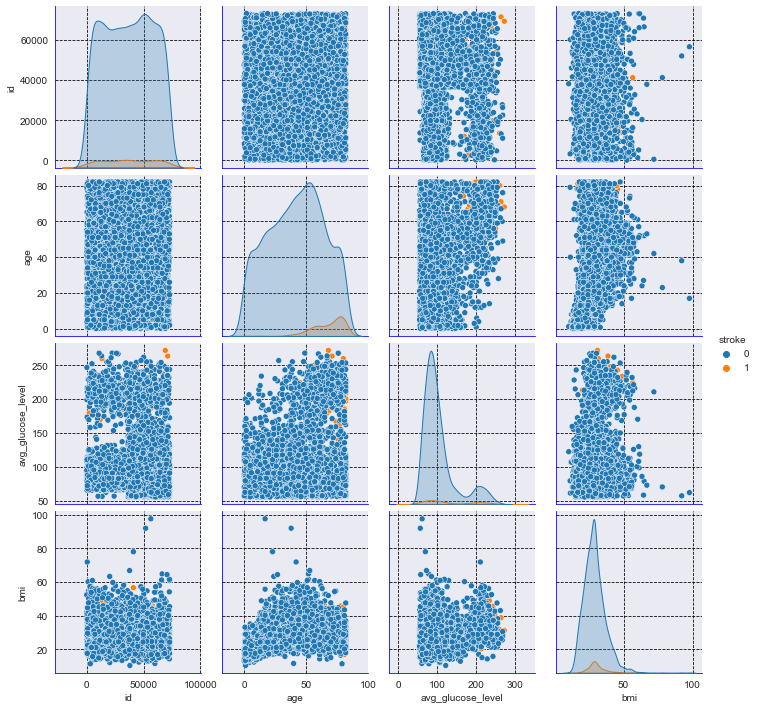

In [ ]:
#pairplot
sns.pairplot(df, hue='stroke')

sulit diinterpretasiin y, mari kita liat dengan serius

### Distribusi Stroke Bedasarkan Gender

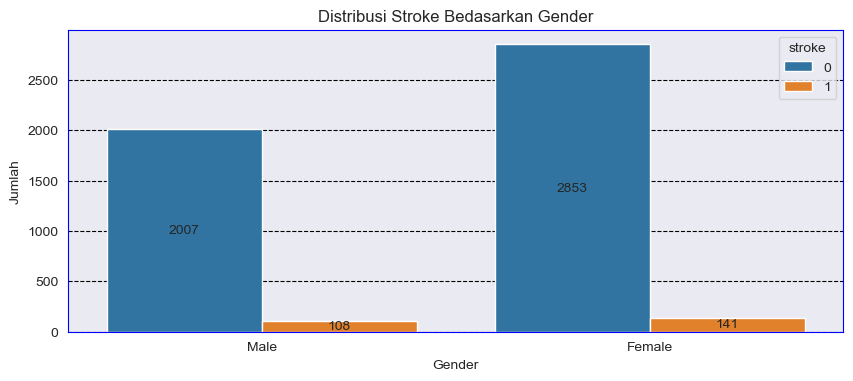

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.gender, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Stroke Bedasarkan Usia

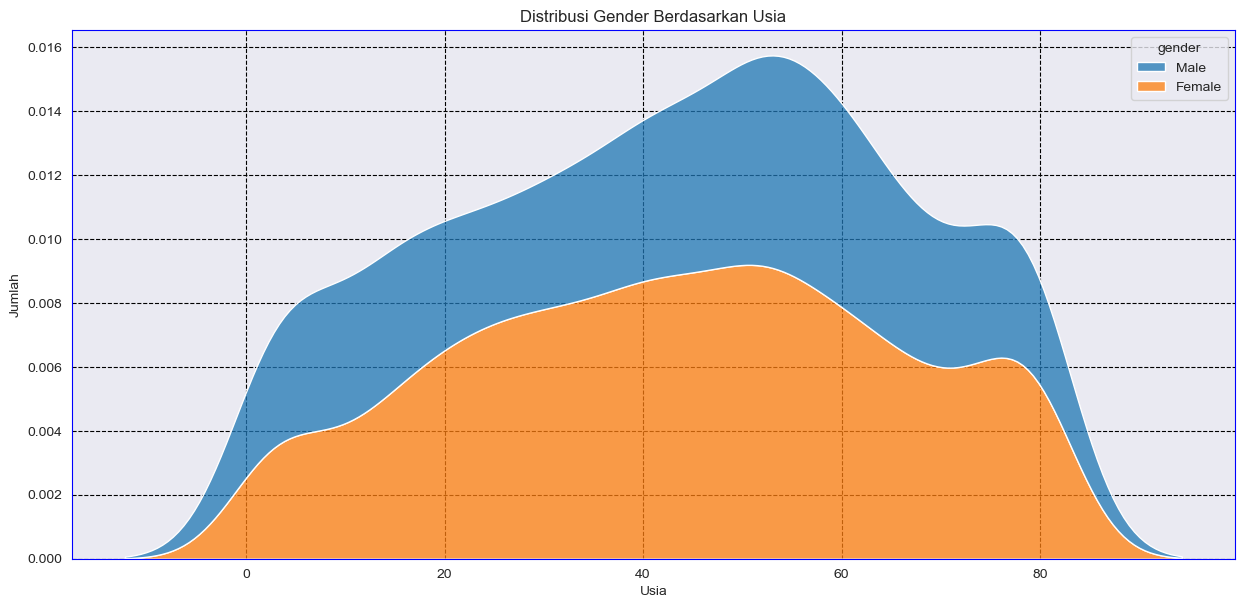

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='age', hue='gender', multiple="stack")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.title("Distribusi Gender Berdasarkan Usia")
plt.show()

### Distribusi Stroke Bedasarkan Hipertensi

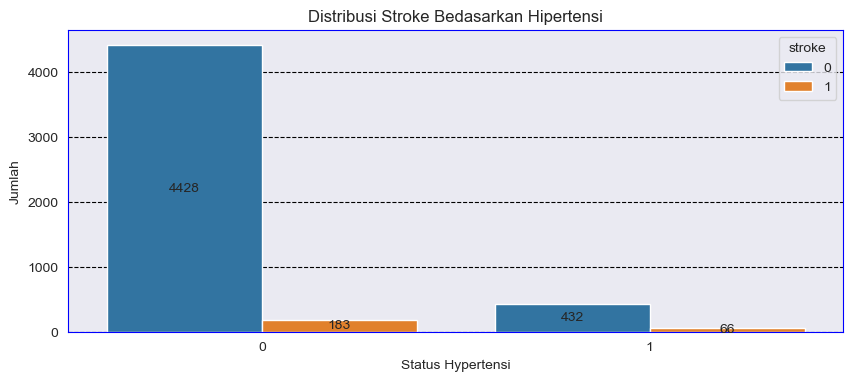

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.hypertension, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Hipertensi')
plt.xlabel('Status Hypertensi')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Stroke Bedasarkan Hearth Desease

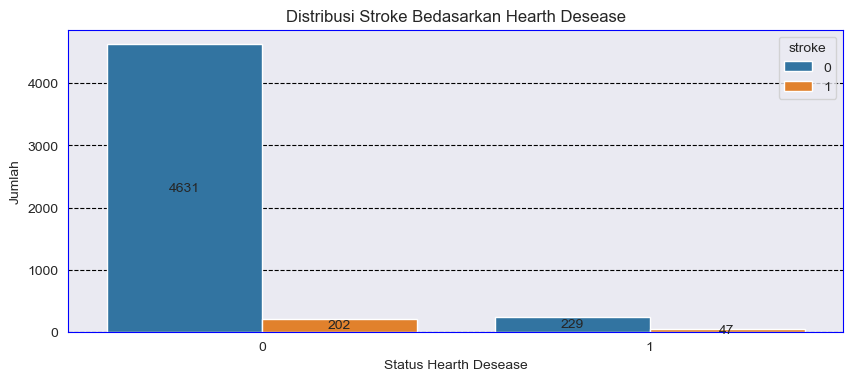

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.heart_disease, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Hearth Desease')
plt.xlabel('Status Hearth Desease')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Stroke Bedasarkan Status Pernikahan

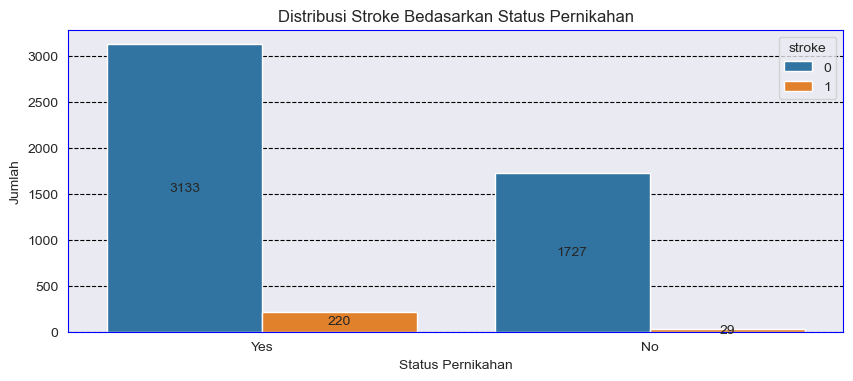

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.ever_married, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Stroke Bedasarkan Jenis Pekerjaan

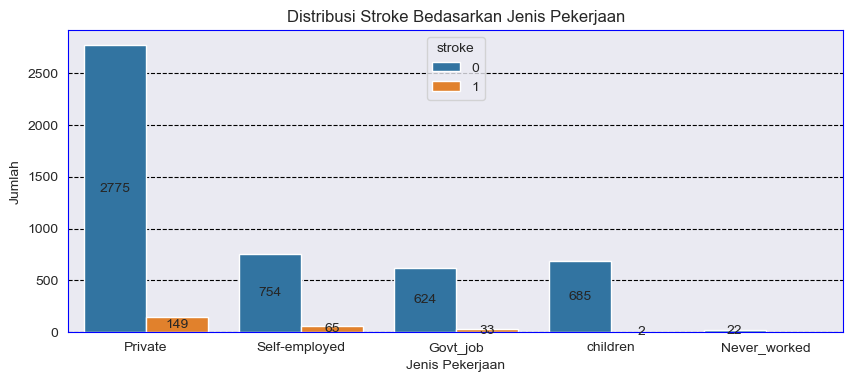

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.work_type, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Stroke Bedasarkan Jenis Hunian

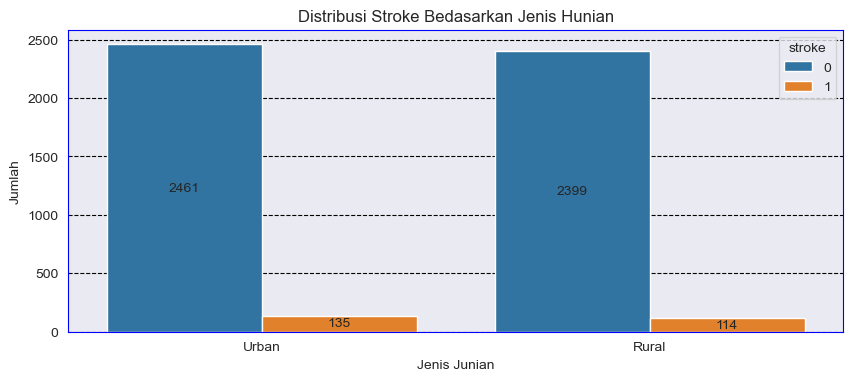

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.Residence_type, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Jenis Hunian')
plt.xlabel('Jenis Junian')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Stroke Bedasarkan Level Glukosa

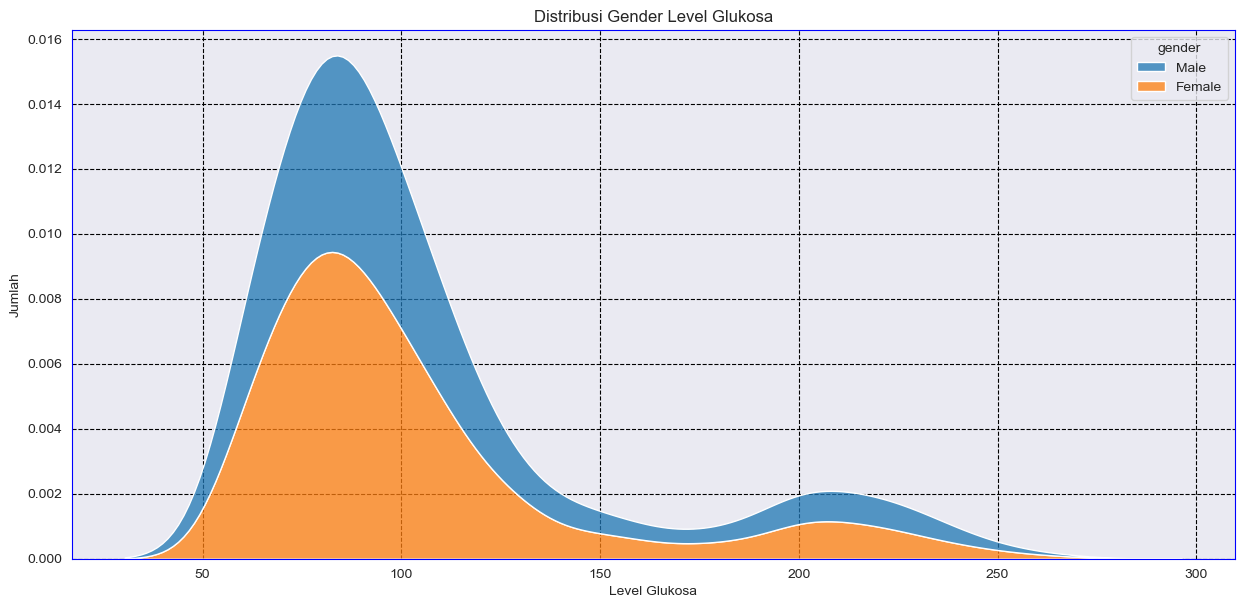

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='avg_glucose_level', hue='gender', multiple="stack")
plt.xlabel("Level Glukosa")
plt.ylabel("Jumlah")
plt.title("Distribusi Gender Level Glukosa")
plt.show()

### Distribusi Stroke Bedasarkan BMI

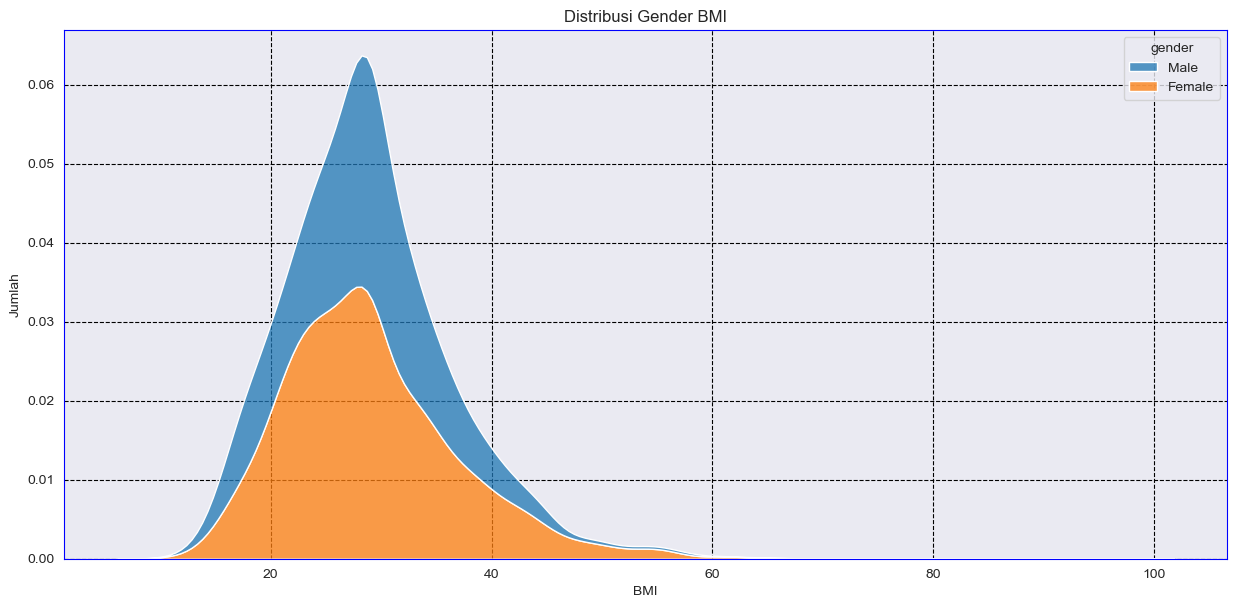

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.kdeplot(data=df, x='bmi', hue='gender', multiple="stack")
plt.xlabel("BMI")
plt.ylabel("Jumlah")
plt.title("Distribusi Gender BMI")
plt.show()

### Distribusi Stroke Bedasarkan Smoking Status

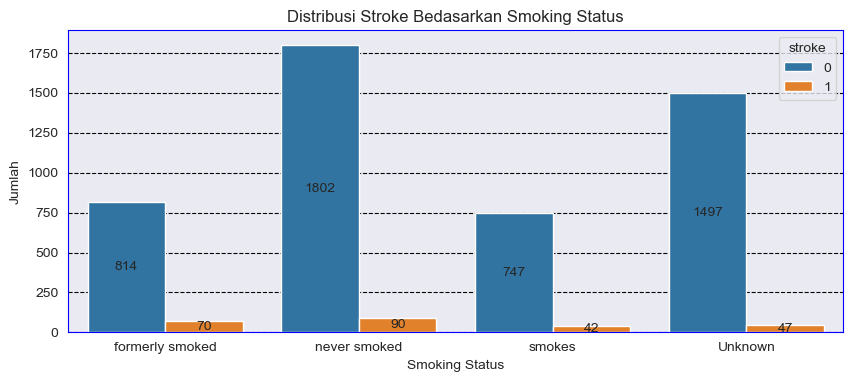

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(data=df, x=df.smoking_status, hue='stroke')
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke Bedasarkan Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Jumlah')
plt.show()

### Korelasi

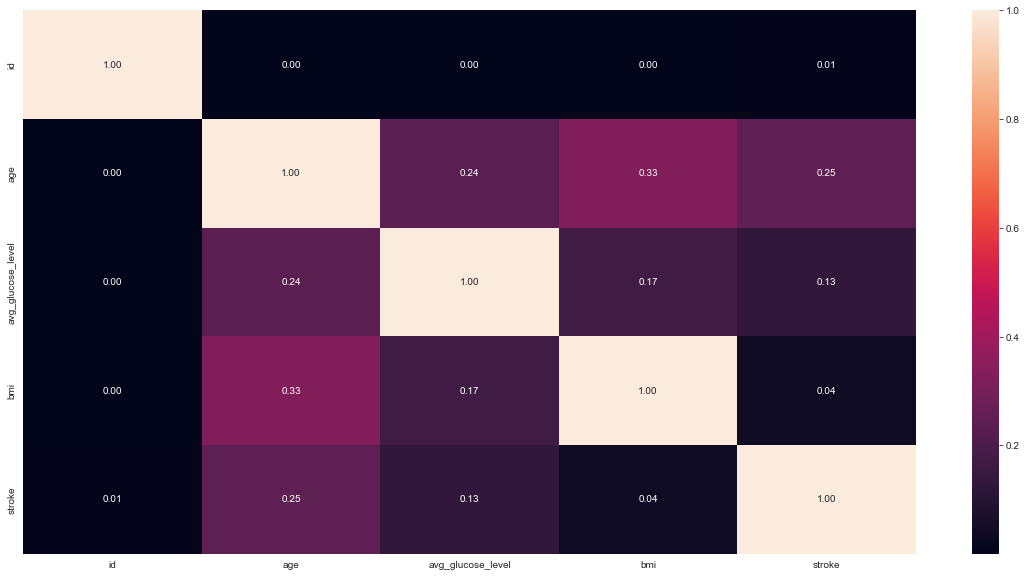

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
# korelasi
# Cek Korelasi
df_korelasi = df.corr()
df_korelasi = df_korelasi['stroke'].sort_values(ascending=False)
df_korelasi = pd.DataFrame(df_korelasi)
df_korelasi = df_korelasi.reset_index()
df_korelasi.columns = ['feature', 'stroke']
df_korelasi.sort_values(by="stroke", ascending=False)

,feature,stroke
0,stroke,1.000000
1,age,0.245239
2,avg_glucose_level,0.131991
3,bmi,0.038917
4,id,0.006430


### Distribusi Stroke

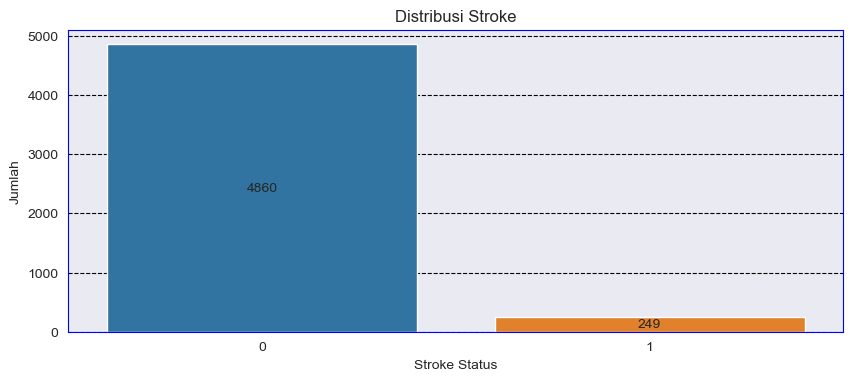

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(x=df.stroke)
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title('Distribusi Stroke')
plt.xlabel('Stroke Status')
plt.ylabel('Jumlah')
plt.show()

## Data Transformation

In [ ]:
#misahin input data sama target data
input_cols = list(df.columns)[1:-1]
target_col = 'stroke'

In [ ]:
input_cols, target_col

(['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status'],
 'stroke')

In [ ]:
# define numeric and categorical columns
numeric_cols = df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes(include='object').columns.tolist()

In [ ]:
numeric_cols

['age', 'avg_glucose_level', 'bmi']

In [ ]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

### Check Outlier

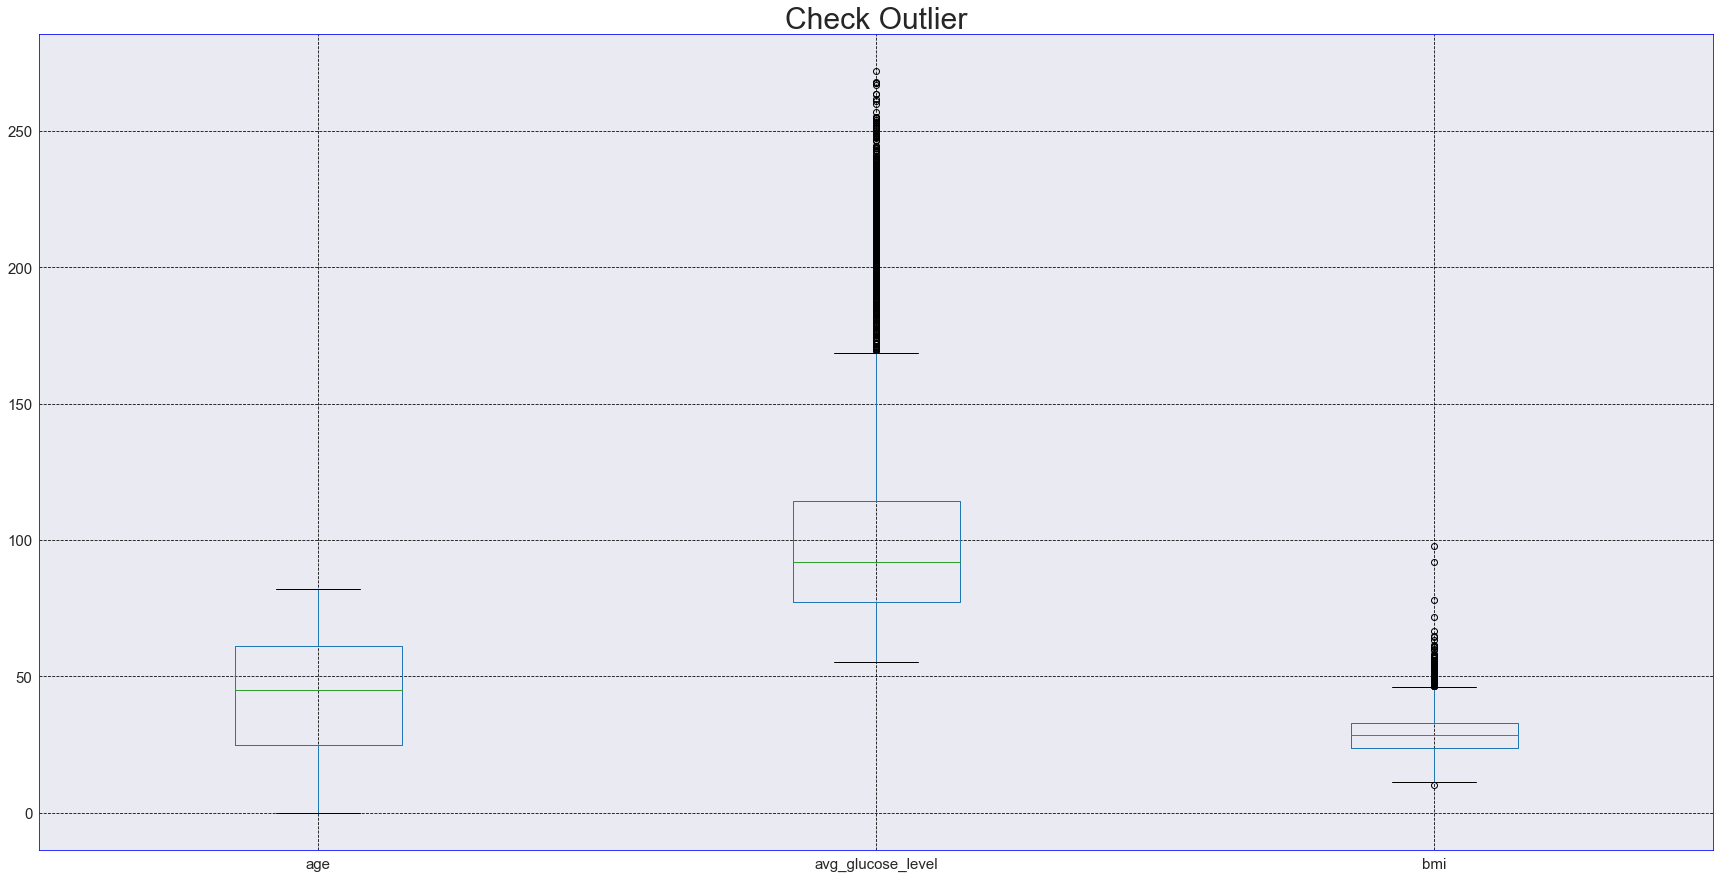

In [ ]:
df[numeric_cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Check Outlier", fontsize=30)
plt.show()

Sepertinya tidak ada outlier

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df[numeric_cols])

StandardScaler()

In [ ]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [ ]:
df[numeric_cols].describe()

,age,avg_glucose_level,bmi
count,5.109000e+03,5.109000e+03,5.109000e+03
mean,3.077275e-16,-1.765187e-16,-2.840206e-16
std,1.000098e+00,1.000098e+00,1.000098e+00
min,-1.908332e+00,-1.126761e+00,-2.415668e+00
25%,-8.062312e-01,-6.382516e-01,-6.618476e-01
50%,7.827984e-02,-3.149342e-01,-6.424957e-02
75%,7.858887e-01,1.755632e-01,5.073659e-01
max,1.714625e+00,3.657189e+00,8.925704e+00


### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [ ]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

### Handling Imbalance Data

In [ ]:
X = df[numeric_cols + encoded_cols]
X

,age,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051242,2.706450,1.001034e+00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.785889,2.121652,1.384627e-15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.626174,-0.004867,4.683922e-01,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.255182,1.437473,7.152261e-01,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.581949,1.501297,-6.358651e-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626174,-0.494481,1.384627e-15,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,1.670400,0.420922,1.442737e+00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,-0.363976,-0.511266,2.215582e-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.343633,1.328375,-4.280049e-01,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y = df[target_col]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

In [ ]:
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


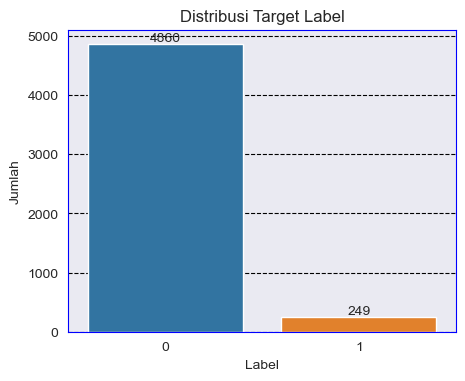

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="edge")
plt.title("Distribusi Target Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
#Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter

X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

[(0, 4860), (1, 4860)]


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


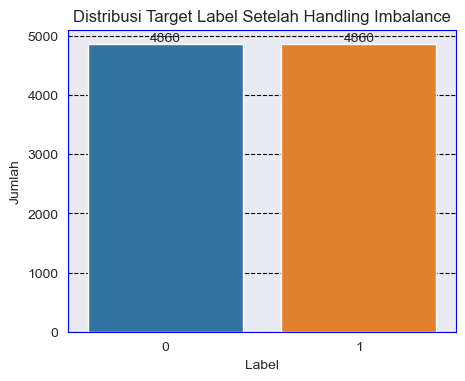

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="edge")
plt.title("Distribusi Target Label Setelah Handling Imbalance")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

## Data Mining

In [ ]:
X.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051242,2.706450,1.001034e+00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.785889,2.121652,1.384627e-15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.626174,-0.004867,4.683922e-01,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.255182,1.437473,7.152261e-01,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.581949,1.501297,-6.358651e-01,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
#membagi data menjadi training dan testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Jumlah data keseluruhan
print('Jumlah data Predictor (X)  :', X.shape)
print('Jumlah data Target (y)     :', y.shape)
print('==========================================')
# Jumlah Data Train
print('Jumlah data Train (X)      :', X_train.shape)
print('Jumlah data Train (y)      :', y_train.shape)
print('===========================================')
# Jumlah Data Test
print('Jumlah data Test (X)       :', X_test.shape)
print('Jumlah data Test (y)       :', y_test.shape)

Jumlah data Predictor (X)  : (9720, 18)
Jumlah data Target (y)     : (9720,)
Jumlah data Train (X)      : (7776, 18)
Jumlah data Train (y)      : (7776,)
Jumlah data Test (X)       : (1944, 18)
Jumlah data Test (y)       : (1944,)


### K Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

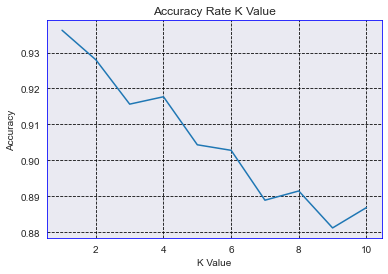

Nilai K terbaik adalah  1
Akurasi sebesar 94 %


In [ ]:
# Mencari nilai K terbaik
from sklearn.model_selection import cross_val_score
accuracies = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), accuracies)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
print("Nilai K terbaik adalah ", accuracies.index(max(accuracies))+1)
print("Akurasi sebesar", round(max(accuracies)*100), "%")

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_mod = model_knn.predict(X_test)
knn_mod[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [ ]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn, average='weighted') * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy     : 100.00%
Precision    : 100.00%
Recall       : 100.00%


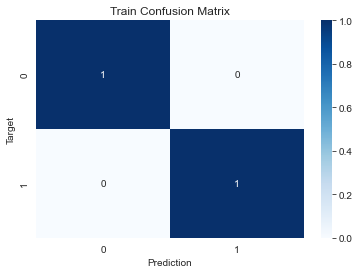

In [ ]:
# Train
knn_train = knn_model(X_train, y_train, name='Train')

Accuracy     : 93.62%
Precision    : 93.88%
Recall       : 93.62%


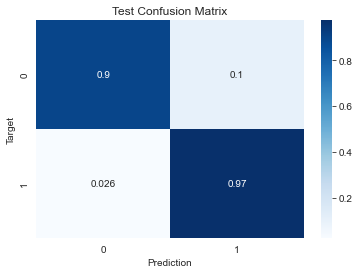

In [ ]:
# Test
knn_pred = knn_model(X_test, y_test, name='Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       976
           1       0.90      0.97      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
def svm_model(inputs, targets, name='' ):
    pred_svm = model_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy : {:.2f}%".format(accuracy_svm * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_svm) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_svm) * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='PuBu')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_svm

Accuracy : 87.90%
Precison : 82.84%
Recall   : 95.63%


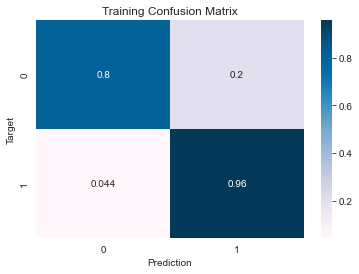

In [ ]:
# Training
train_svm = svm_model(X_train, y_train, 'Training')

Accuracy : 85.91%
Precison : 80.65%
Recall   : 94.32%


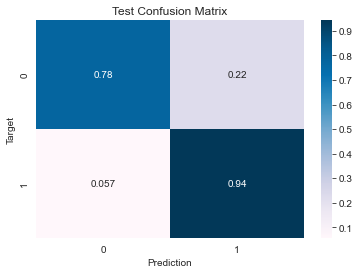

In [ ]:
# Prediksi SVM
pred_svm = svm_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       976
           1       0.81      0.94      0.87       968

    accuracy                           0.86      1944
   macro avg       0.87      0.86      0.86      1944
weighted avg       0.87      0.86      0.86      1944



In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE SVM',mean_absolute_error(y_test, pred_svm))

MAE SVM 0.14094650205761317


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='plasma')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy : 65.73%
Precison : 59.54%
Recall   : 98.36%


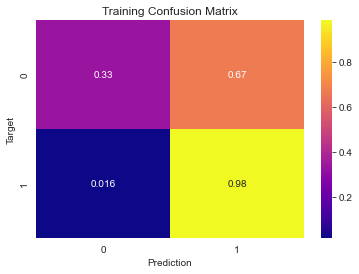

In [ ]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy : 65.84%
Precison : 59.49%
Recall   : 98.45%


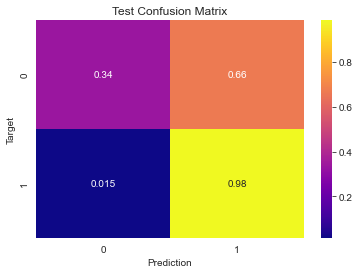

In [ ]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.96      0.34      0.50       976
           1       0.59      0.98      0.74       968

    accuracy                           0.66      1944
   macro avg       0.78      0.66      0.62      1944
weighted avg       0.78      0.66      0.62      1944



In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_pred))

MAE Naive Bayes 0.34156378600823045


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=15, min_samples_leaf=15) #ini udah dicoba tanpa parameter jadi overfitting, jadi kita kurangin kompleksitas model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=15)

In [ ]:
def dt_model(inputs, targets, name=''):
    pred_dt = model_dt.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy : {:.2f}%".format(accuracy_dt * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_dt) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_dt) * 100))

    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='inferno')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_dt

Accuracy : 89.97%
Precison : 89.02%
Recall   : 91.21%


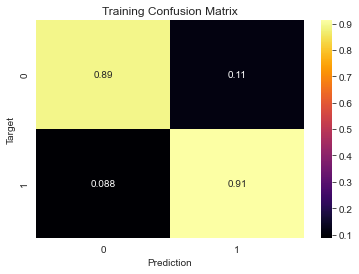

In [ ]:
train_dt = dt_model(X_train, y_train, 'Training')

Accuracy : 85.60%
Precison : 84.40%
Recall   : 87.19%


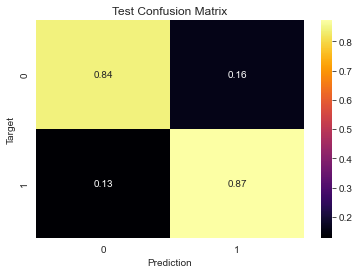

In [ ]:
dt_pred = dt_model(X_test, y_test, 'Test')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       976
           1       0.84      0.87      0.86       968

    accuracy                           0.86      1944
   macro avg       0.86      0.86      0.86      1944
weighted avg       0.86      0.86      0.86      1944



In [ ]:
from sklearn.tree import plot_tree, export_text

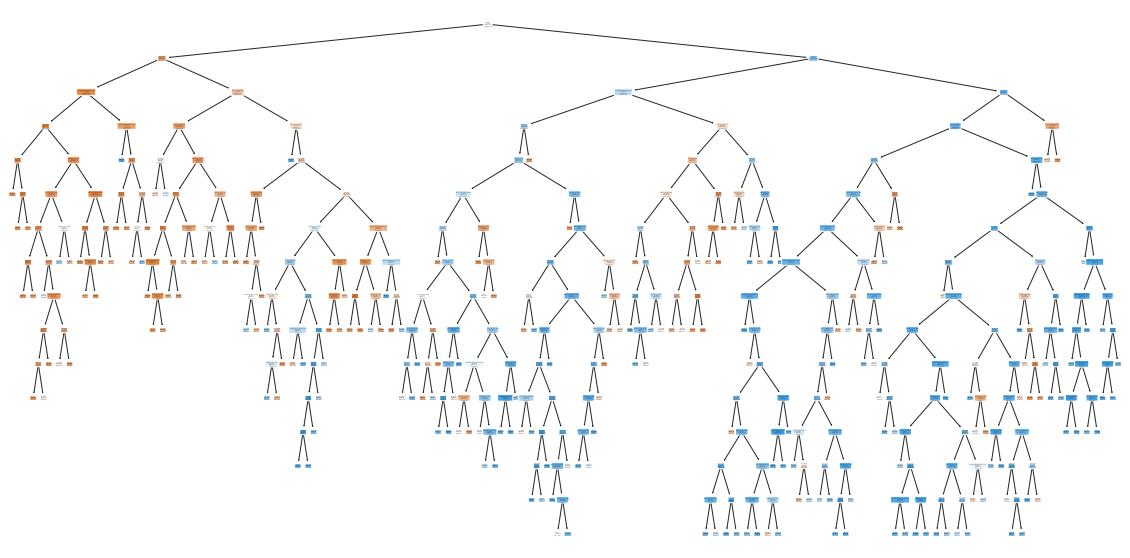

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model_dt, filled=True, rounded=True, feature_names=X.columns);
plt.show()

hmmmmm oke kita tampilin 2 depth aja yaa

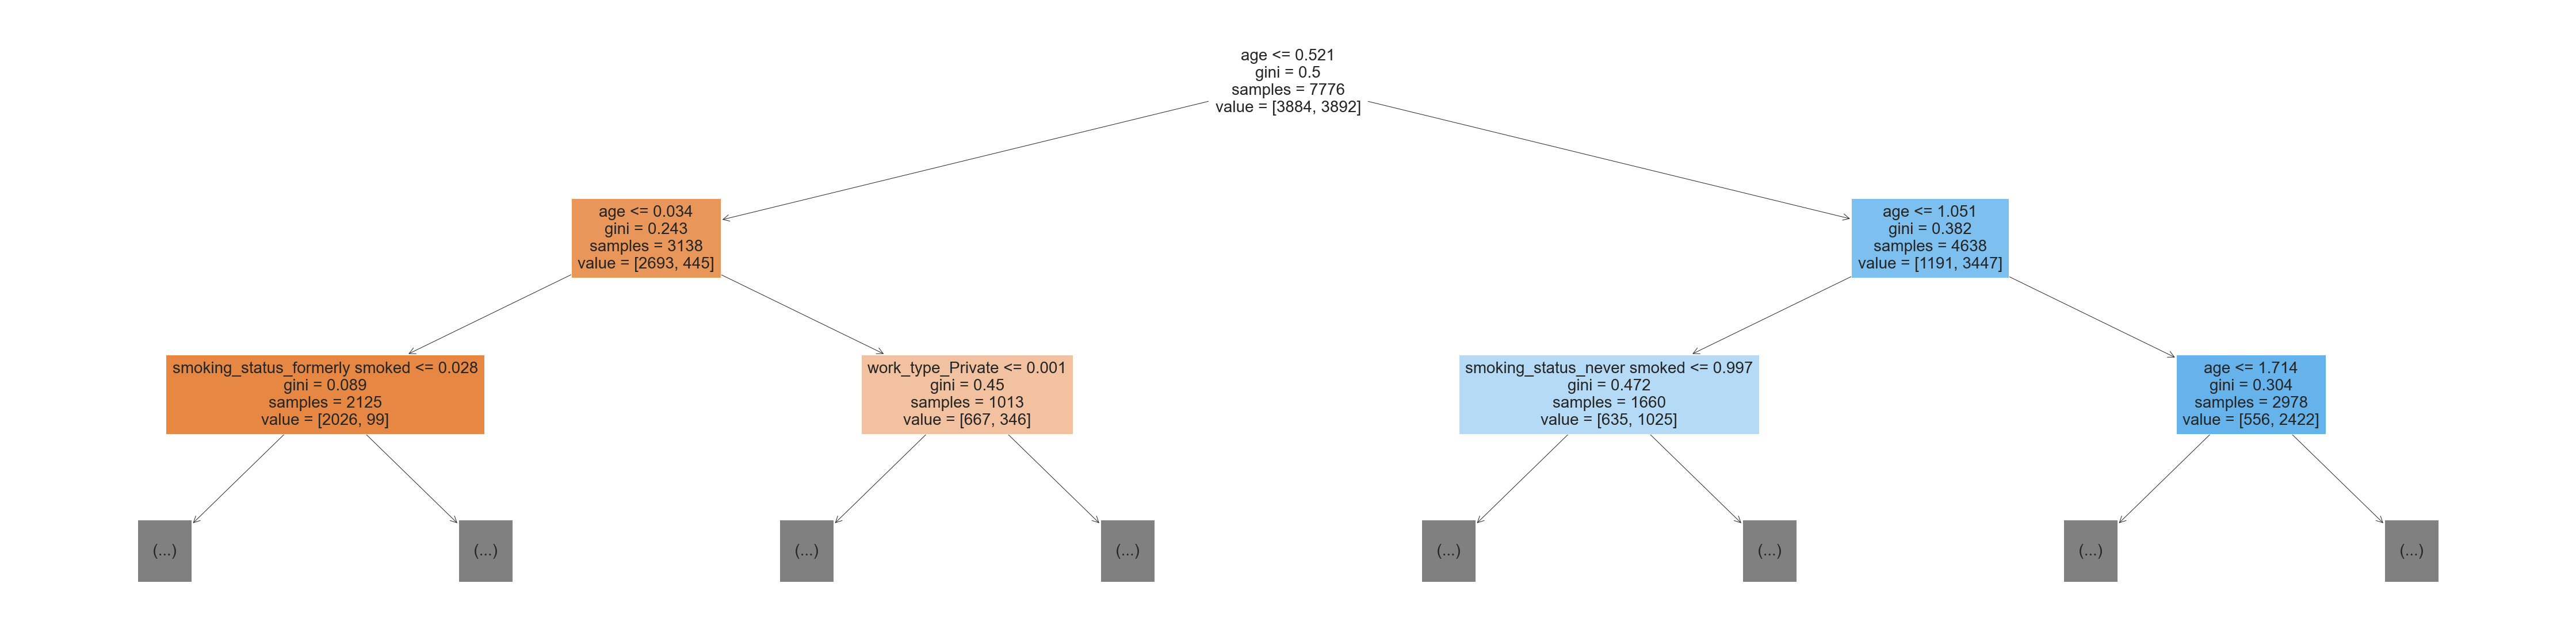

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dt.feature_importances_
}).sort_values('importance', ascending=False)

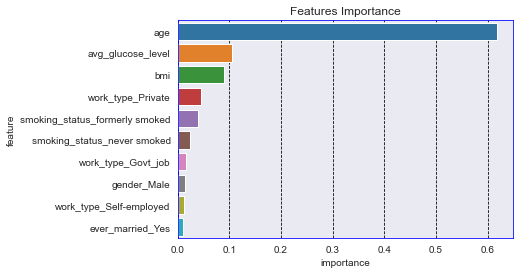

In [ ]:
plt.title("Features Importance")
sns.barplot(data = importance_df[0:10], x='importance', y='feature');

oke tuh berdasarkan model decision tree bahwa usia, kadar glukosa dan bmi merupakan faktor yang mempengaruhi stroke.

## Hyperparameter Tuning

karena model yang terbaiknya KNN ya, jadi hyperparameter tuningnya KNN aja. Apa perlu semuanya?

## KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameternya pake GridSearch, ada satu lagi namanya random search tapi gridsearch lebih baik. cari jurnal yg bagus bagusin gridsearch pasti banyak.

In [ ]:
#ini parameter untuk gridsearch, dipake semua parameter KNNnya
param_knn = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}

1. n_neighbors: Jumlah tetangga terdekat yang akan digunakan untuk mengklasifikasikan setiap sampel.

2. weights: Mengatur cara memberikan bobot pada tetangga terdekat. Beberapa opsi yang dipake adalah:
* 'uniform': Memberikan bobot yang sama pada semua tetangga terdekat.
* 'distance': Memberikan bobot yang berbanding terbalik dengan jarak. Tetangga yang lebih dekat akan memiliki pengaruh yang lebih besar pada klasifikasi.

3. algorithm: Algoritma yang digunakan untuk menghitung tetangga terdekat. Beberapa opsi adalah:
* 'auto': Algoritma akan memilih algoritma terbaik berdasarkan jenis masukan.
* 'ball_tree': Menggunakan struktur data BallTree untuk menghitung tetangga terdekat.
* 'kd_tree': Menggunakan struktur data KDTree untuk menghitung tetangga terdekat.
* 'brute': Menggunakan pencarian brute force untuk menghitung tetangga terdekat.

4. metric: **(pelajaran Bu Ina)** Metrik jarak yang digunakan untuk mengukur jarak antara sampel. Beberapa metrik yang umum digunakan dalam KNN adalah:
* 'euclidean': Menggunakan jarak Euclidean.
* 'manhattan': Menggunakan jarak Manhattan.
* 'minkowski': Menggunakan jarak Minkowski dengan parameter p.



In [ ]:
%%time
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

CPU times: total: 8.12 s
Wall time: 5min 45s


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

karena ini stroke prediction jadi untuk metrics evaluasinya itu pakai f1-score aja, jadi untuk hyperparameternya kita coba tingkatin f1-score. kenapa? karena false negative maupun false positive memiliki konsekuensi serius. bayangin aja masa orang ga stroke diprediksi stroke sebaliknya orang yang stroke diprediksi ga stroke. jadi kita ningkatin performa model untuk ini.

**Udah belajar kan tentang precision, recall, f1-score, akurasi?**
kemungkinan besar bakalan ditanya

In [ ]:
best_params = grid_knn.best_params_
print("Hyperparameter terbaik:", best_params)

Hyperparameter terbaik: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
pred_grid_knn = grid_knn.predict(X_test)

In [ ]:
def grid_knn_model(inputs, targets, name=''):
    pred_knn = grid_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn, average='weighted') * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn, average='weighted') * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

Accuracy     : 100.00%
Precision    : 100.00%
Recall       : 100.00%


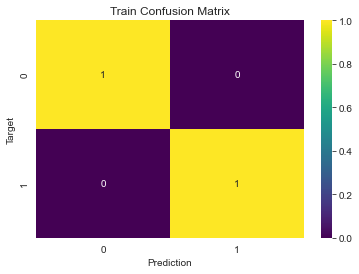

In [ ]:
# Train
knn_train = grid_knn_model(X_train, y_train, name='Train')

Accuracy     : 93.62%
Precision    : 93.86%
Recall       : 93.62%


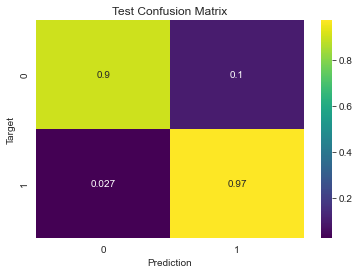

In [ ]:
# Test
knn_pred = grid_knn_model(X_test, y_test, name='Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_grid_knn))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       976
           1       0.91      0.97      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



## SVM

In [ ]:
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
model_svm = SVC()

In [ ]:
grid_svm = GridSearchCV(estimator=model_svm, param_grid=param_svm, scoring='f1')

In [ ]:
%%time
grid_svm.fit(X_train, y_train)

CPU times: total: 4min 57s
Wall time: 5min 3s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [ ]:
best_params = grid_svm.best_params_
print("Hyperparameter terbaik:", best_params)

Hyperparameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
def grid_svm_model(inputs, targets, name='' ):
    pred_svm = grid_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy : {:.2f}%".format(accuracy_svm * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_svm) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_svm) * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='PuBu')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_svm

Accuracy : 92.55%
Precison : 88.91%
Recall   : 97.25%


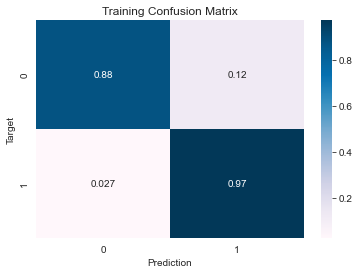

In [ ]:
train_svm = grid_svm_model(X_train, y_train, 'Training')

Accuracy : 89.61%
Precison : 85.59%
Recall   : 95.14%


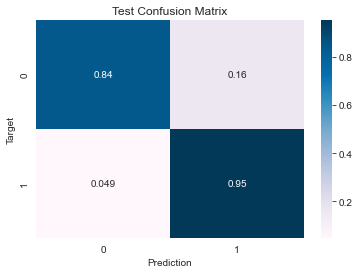

In [ ]:
pred_svm = grid_svm_model(X_test, y_test, 'Test')

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       976
           1       0.86      0.95      0.90       968

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.90      1944
weighted avg       0.90      0.90      0.90      1944



## Naive Bayes

In [ ]:
model_nb = GaussianNB()

In [ ]:
param_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


In [ ]:
grid_nb = GridSearchCV(estimator=model_nb, param_grid=param_nb, scoring='f1')

In [ ]:
%%time
grid_nb.fit(X_train, y_train)

CPU times: total: 516 ms
Wall time: 582 ms


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='f1')

In [ ]:
best_params = grid_nb.best_params_
print("Hyperparameter terbaik:", best_params)

Hyperparameter terbaik: {'var_smoothing': 1e-09}


In [ ]:
def grid_nb_model(inputs, targets, name=''):
    pred_nb = grid_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='plasma')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy : 65.81%
Precison : 59.57%
Recall   : 98.59%


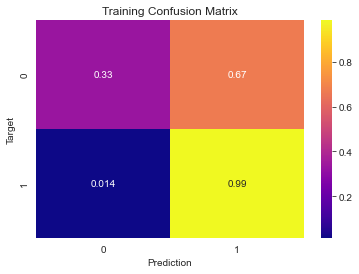

In [ ]:
train_nb = grid_nb_model(X_train, y_train, 'Training')

Accuracy : 65.90%
Precison : 59.53%
Recall   : 98.45%


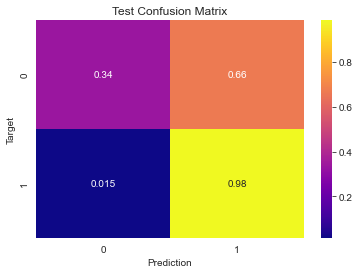

In [ ]:
nb_pred = grid_nb_model(X_test, y_test, 'Test')

In [ ]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.96      0.34      0.50       976
           1       0.60      0.98      0.74       968

    accuracy                           0.66      1944
   macro avg       0.78      0.66      0.62      1944
weighted avg       0.78      0.66      0.62      1944



## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
param_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_dt = GridSearchCV(model_dt, param_dt, cv=5, scoring='f1')

In [ ]:
%%time
grid_dt.fit(X_train, y_train)

CPU times: total: 30 s
Wall time: 34 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
best_params = grid_dt.best_params_
print("Hyperparameter terbaik: ", best_params)

Hyperparameter terbaik:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_dt_model = grid_dt.best_estimator_

In [ ]:
def grid_dt_model(inputs, targets, name=''):
    pred_dt = best_dt_model.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy : {:.2f}%".format(accuracy_dt * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_dt) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_dt) * 100))

    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='inferno')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_dt

Accuracy : 100.00%
Precison : 100.00%
Recall   : 100.00%


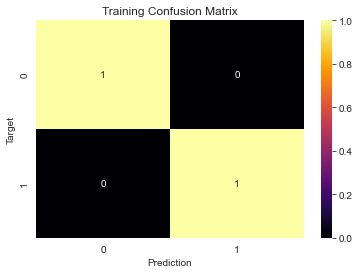

In [ ]:
train_dt = grid_dt_model(X_train, y_train, 'Training')

Accuracy : 89.61%
Precison : 88.45%
Recall   : 91.01%


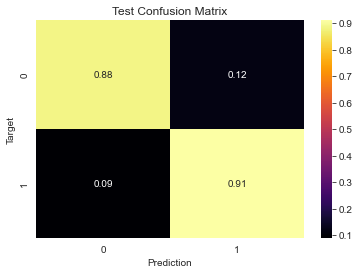

In [ ]:
dt_pred = grid_dt_model(X_test, y_test, 'Test')

In [ ]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       976
           1       0.88      0.91      0.90       968

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.90      1944
weighted avg       0.90      0.90      0.90      1944



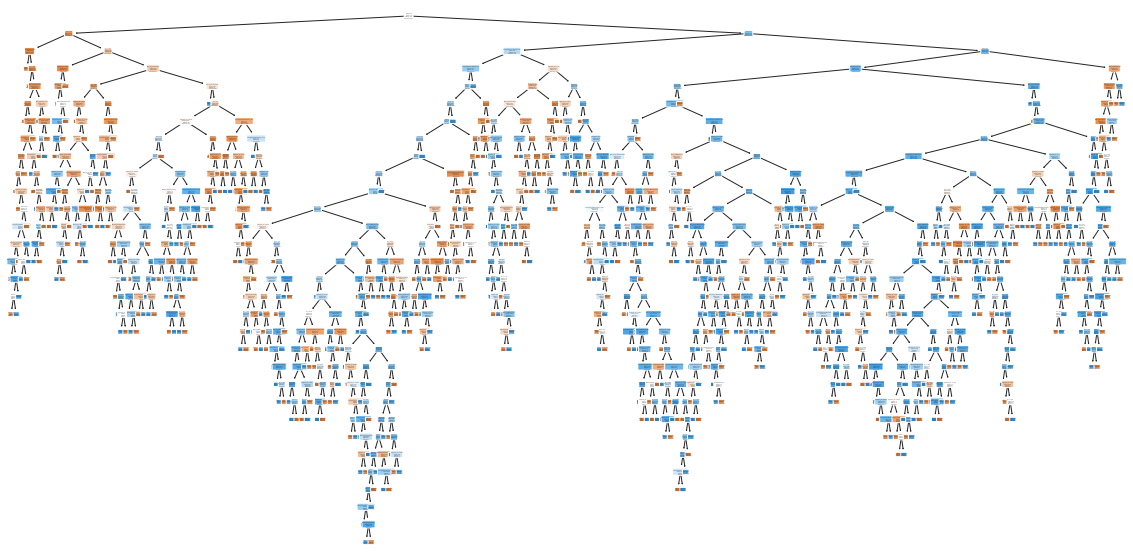

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_dt_model, filled=True, rounded=True, feature_names=X.columns);
plt.show()

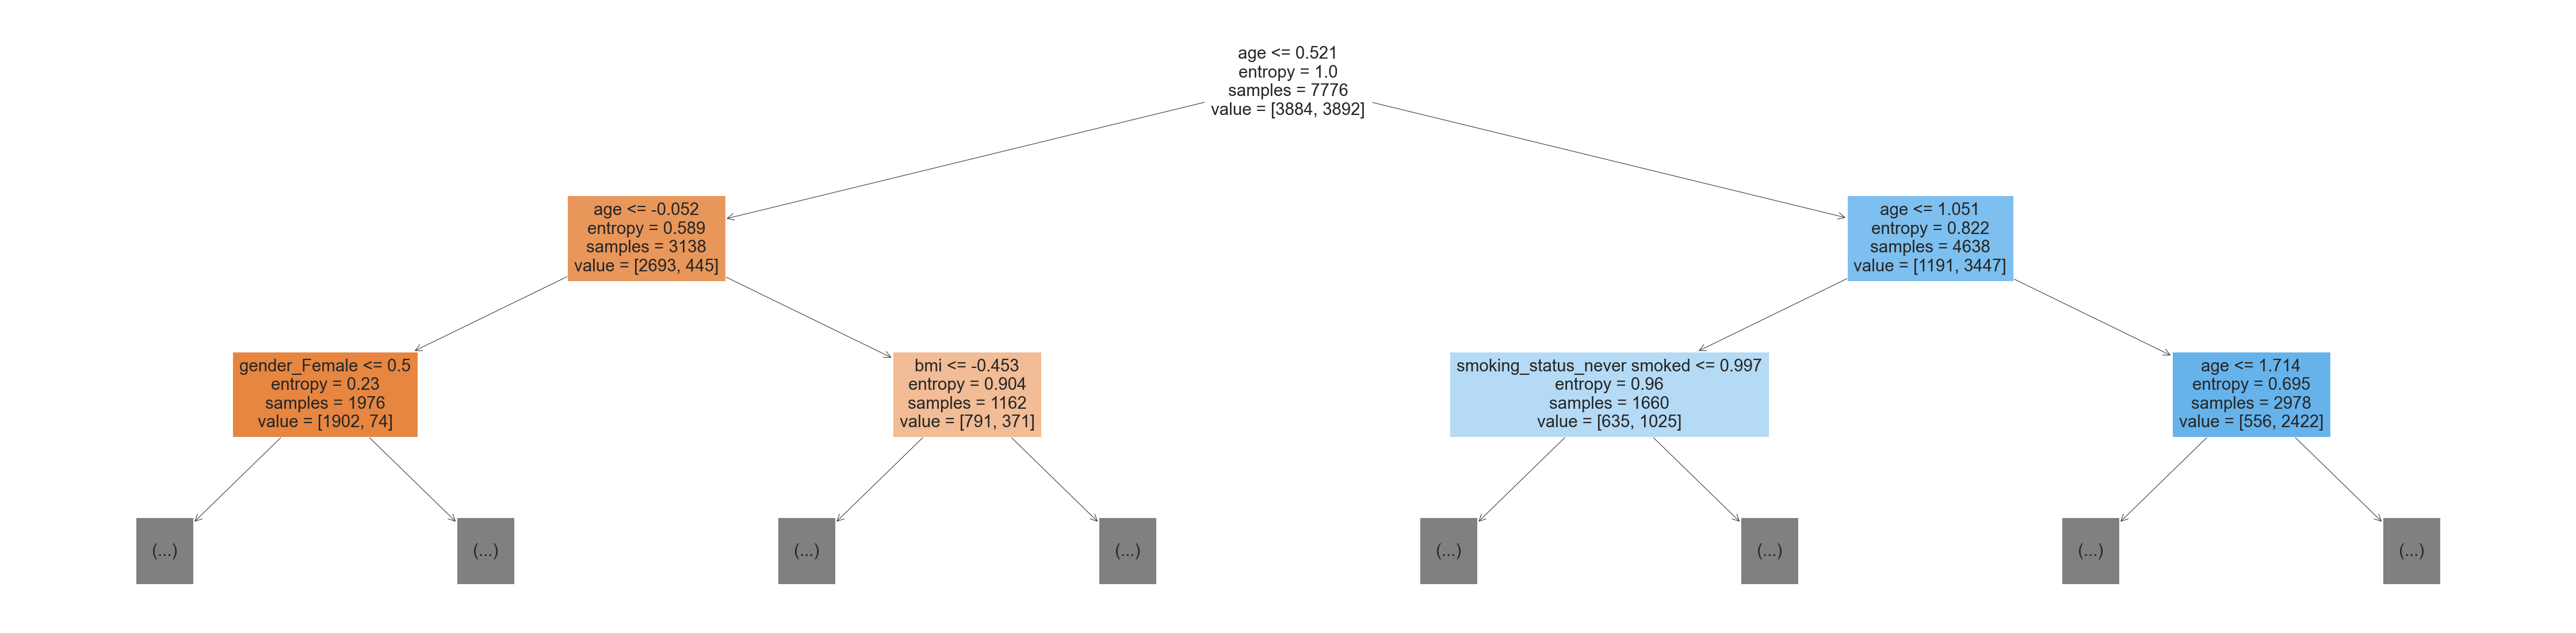

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(best_dt_model, feature_names=X_train.columns, max_depth=2, filled=True)
plt.show()

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_dt_model.feature_importances_
}).sort_values('importance', ascending=False)

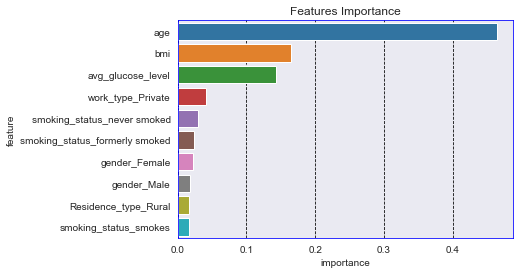

In [ ]:
plt.title("Features Importance")
sns.barplot(data = importance_df[0:10], x='importance', y='feature');